# COGS 108 - Final Project 

# Overview

Our goal for this project is to determine whether or not the release month of a movie, would affect its revenue or rating. Our approach is to obtain data from two different data sets, clean and merge them to have one data set with all the information. Using that information, we would first try to do visual analysis, and after that, we would attempt to make predictions based on previous year's data.

# Names

- Amir Rashidi
- Amir Farhan
- Byungkwon Han
- Xiaotian Shi
- Jason Tam

# Group Members IDs

- A15752965
- A14771549
- A13792651
- A13614310
- A14886125

# Research Question

When is the best time for manufacturers to release a movie in the United States, in order to maximize revenue?

## Background and Prior Work

People always want to spend their time and money as well as they can and choosing which movie to watch is no exception. Whenever movies are released, one of the easiest way
s for the public to rate them is box office revenue. This is an impartial rating based on number people watching and not their opinion of the movie although the general public’s opinion for good movies cause revenue to go up generally.

Other methods of public rating like movie review websites, IMDb.com or Rottentomatoes.com, are more influenced by people that will rate on the website. This makes those a less accurate representation of the general opinion. We want to determine whether the box office revenue is affected by general release time in the year and its release time relative to other movies.

Prior Work: August and September are believed to be dump months, because they are the end of the summer and children are going back to schools. January and Feburary are also believed tobe dump months because they are the months just past the Academy Award nominations, and also months that large cities could be shut down easily by snowstorms.

Source: https://tvtropes.org/pmwiki/pmwiki.php/Main/DumpMonths

# Hypothesis


Although the revenue that a movie eventually earns depends on many different factors, it directly depends on how many tickets it can sell.

Based on this, our first assumption is that a movie earns more if it is released during the leisure months (the period a group is relatively less busy like holiday months in the United States and summer) of its targeted audiences. Thus, we believe that the revenue might be related to time, because the audience has more availability to watch movies and spend their free time on whatever they want.

Our second hypothesis, which follows the first, is that the revenue is also influenced by the release time relative to other events. Since people's money and time are limited, if the movie is released when there are other events (major social/entertainment events, or other popular movies) coming, people who originally planned to watch the movie may give up on it.

The qualities of movies could be a potential confounding factor here since it is natural for people to not watch movies that are rated badly. This is because if a movie is good, people convince others to watch it and if it’s bad vice versa which causes an expected positive correlation between revenue and rating. We will compare the ratings of movies in different months, and try to find a possible correlation between them if there is any.


# Dataset(s)

Dataset Name: The Numbers Domestic Boxoffice Dataset<br>
Link to the dataset: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time<br>
Number of observations: 1100<br>
Description: This dataset contains 1100 bestseller movies along with their domestic, international, and worldwide box<br>offices. We will only be using the domestic box offices.

Dataset Name: OMDb Movie Dataset<br>
Link to the dataset: https://www.omdbapi.com<br>
Number of observations: 1098<br>
Description: This dataset contains IMDb, Metacritic, and Rotten Tomatoes ratings of the movies in the other dataset. It also contains <br>the release dates. 

We will join the two datasets on movie name in order to get the ratings, release dates, and box offices information in the same data frame.

# Setup

Before we start setting up and cleaning the data, we deleted 2 rows from The Numbers Domestic Boxoffice Dataset, because the form of the 2 rows make it hard to query data from OMDb. Moreover, after manually fixing the form, it seems that the result from OMDb to be containing all NaN values. Thus, we decided to remove those 2 rows. As a result, the joined dataset has 1098 rows.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# omdb_joined.csv is the dataset resulting from joining the two raw datasets
df_omdb = pd.read_csv("./data/omdb_joined.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
# Use the ranks as indices
# The unnamed columns, which represent the original indices, will be dropped
df_omdb.set_index('Rank', inplace=True)
df_omdb.drop(df_omdb.columns[df_omdb.columns.str.contains('unnamed',case = False)],
             axis = 1, inplace = True)

In [4]:
# Rename the column names('Released' -> 'Year', 'Released Month' -> 'Month',
# 'IMDB Votes' -> 'IMDb Votes')
df_omdb.rename(index=str, columns={'Released': 'Year', 'Released Month': 'Month',
                                   'IMDB Votes': 'IMDb Votes'}, inplace=True)

In [5]:
# Count the number of NaN values in the 'Month' and 'DomesticBox Office' column
# These rows will be dropped because the release month and box offices are the
# primary targets that we will be exploring, without these values, the row is 
# useless
naMonth = df_omdb['Month'].isna().sum()
naBoxOffice = df_omdb['DomesticBox Office'].isna().sum()
print('NaN Month count:', naMonth)
print('NaN Box Office count:', naBoxOffice)

NaN Month count: 2
NaN Box Office count: 0


The result of the last cell shows that we have 2 NaN values in the 'Month' column, and 0 NaN values in the 'DomesticBox Office' column. We will drop the two rows which contain NaN Months.

In [6]:
# Drop NaNs in Month column
# Convert the Month column to only containing release months
df_omdb.dropna(subset=['Month'], inplace=True)
for idx, row in df_omdb.iterrows():
    month = row['Month'][3:6]
    df_omdb.at[idx, 'Month'] = month

# convert the Month column to integer
look_up = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 
           'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df_omdb['Month'] = df_omdb['Month'].apply(lambda x: look_up[x])

In [7]:
# Drop the columns 'InternationalBox Office' and 'WorldwideBox Office'
# Our question only concerns the domestic revenues, we won't need these two columns
df_omdb.drop(axis=1, columns=['InternationalBox Office', 'WorldwideBox Office'],
             inplace=True)

In [8]:
# Convert the 'DomesticBox Office' column to integers
for idx, row in df_omdb.iterrows():
    revenue = ''.join(filter(str.isdigit, row['DomesticBox Office']))
    df_omdb.at[idx, 'DomesticBox Office'] = revenue

df_omdb['DomesticBox Office'] = pd.to_numeric(df_omdb['DomesticBox Office'])

In [9]:
# Convert the 'IMDb Votes' column to integers
def votes_to_int(strin):
    strin = strin.replace(',', '')
    return int(strin)

df_omdb.loc[:, 'IMDb Votes'] = df_omdb['IMDb Votes'].apply(votes_to_int)

In [10]:
# Reorder the columns
df_omdb = df_omdb[['Movie', 'Genre', 'Year', 'Month', 'DomesticBox Office',
                   'IMDb Votes', 'IMDb Ratings', 'Metacritic', 'Rotten Tomatoes']]

In [11]:
# Check whether the dataframe is in good shape
print("Unique months:", df_omdb['Month'].unique())
print("Box Office Column dtype:", df_omdb['DomesticBox Office'].dtype)

Unique months: [12  2  4  6  5  7  3 11  1  8  9 10]
Box Office Column dtype: int64


In [12]:
# save intermediate dataframe
df_omdb.to_csv('./data/omdb_cleaned.csv')

<b>Summary of Data Cleaning</b>

The two datasets are good enough that their data are already standardized. All the values in the DomesticBox Office column can be converted to int64 easily, and all values in the Month column all have the same format. Thus, our job on data cleaning is fairly simple

<b>1. Pre-processsing:</b> 2 rows dropped from The Numbers Domestic Boxoffice Dataset (deleted directly in the file). Those two rows result in NaN values when querying the second dataset. We removed 'Mr. and Mrs. Smith' and 'Split'.

<b>2. Columns Dropped:</b> 'InternationalBox Office', 'WorldwideBox Office'

Our question concerns the domestic revenue of the movies. These two information in the data frame will not be used. We believe this will not affect the result because they are irrelevant.

<b>3. Rows Dropped:</b> 2 rows where the 'Month' column contain NaN

We have to drop these two rows because they do not contain a critical row of our interest. We are exploring the relationship between the release time and domestic revenue. Without the Month column the rows are useless.

<b>4. Other informations dropped:</b> The exact release dates originally contained in the 'Month' column



We dropped this information because we are not studying exact dates. Instead, we only care about the relationship between the release month and domestic revenue. Different release dates may also influence the revenue of a movie. However, because movies are often on show for several weeks, we decide to not consider this information. By doing this, we risk losing some information that might influence our result.

# Descriptive Analysis

Obtain the cleaned data. 

In [13]:
df = pd.read_csv('./data/omdb_cleaned.csv')

# Size

In [14]:
# Print the size of the data
num_movies,info = df.shape
print("Number of movies: ", num_movies)
print("Variables for each movie: ", info)

Number of movies:  1096
Variables for each movie:  10


# Missingness

In [15]:
# Output the number of null elemeents in each column of the data
df.isnull().sum()

Rank                   0
Movie                  0
Genre                  0
Year                   0
Month                  0
DomesticBox Office     0
IMDb Votes             0
IMDb Ratings           0
Metacritic            16
Rotten Tomatoes       24
dtype: int64

For ratings, we will not be using information from Metacritic or Rotten Tomatoes. Instead, we will only be using data from IMDb. Therefore, we will not have any missing data in our analysis.

# Shape

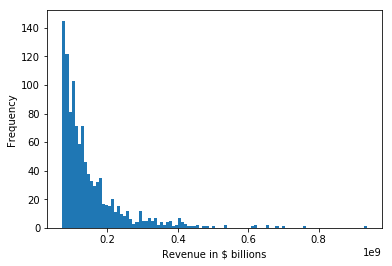

In [16]:
# Plot a histogram comparing the number of movies that make each revenue category
plt.figure()
plt.xlabel("Revenue in $ billions")
df['DomesticBox Office'].plot.hist(bins=100)

f1 = plt.gcf()

We can see from the graph that the data is heavily skewed right indicating that revenue is usually around 100 billion. 

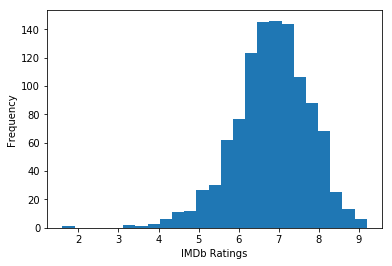

In [17]:
# Plot a histogram comparing the number of movies that get a certain rating on IMDb
plt.figure()
plt.xlabel("IMDb Ratings")
df['IMDb Ratings'].plot.hist(bins=25)

f2 = plt.gcf()

We can see from the graph that the data is normally distributed with a peak at 7.

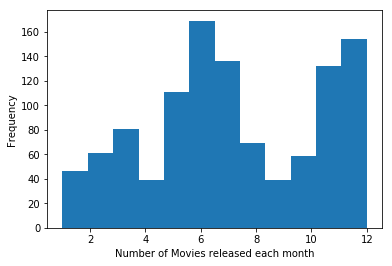

In [18]:
plt.figure()
plt.xlabel("Number of Movies released each month")
df['Month'].plot.hist(bins=12)

f2 = plt.gcf()

# Central Tendency

Since the data for revenue is skewed, we will find the median for the following steps since mean will not be a good indicator of central tendency. The data for ratings is mostly normal so we can use mean for ratings because the mean will be around the middle of the data.

In [19]:
median_revenue = df['DomesticBox Office'].median()
mean_ratings = df['IMDb Ratings'].mean()
print("The median for revenues is $", median_revenue)
print("The mean for rating is ", mean_ratings)

The median for revenues is $ 118532934.0
The mean for rating is  6.806386861313869


# Variability

For revenue, we use IQR since our central tendency was calculated using median and std wouldn't be a good indication of variability with a skewed graph. For ratings, we use standard deviation because we can see how far our data is from a line of best fit.

In [20]:
lower_revenue,upper_revenue = np.percentile(df['DomesticBox Office'], [25,75])
iqr_revenue = upper_revenue - lower_revenue
print("The interquatile range for revenues is $" + str(iqr_revenue))
std_ratings = df['IMDb Ratings'].std()
print("The standard deviation of ratings is " + str(std_ratings))

The interquatile range for revenues is $82755090.0
The standard deviation of ratings is 0.9275072361079976


# Exploratory Analysis

In [21]:
# Read the cleaned data
df = pd.read_csv('./data/omdb_cleaned.csv')

In exploratory analysis, we firstly want to describe our data using `pd.DataFrame.describe()`.

In [22]:
df.describe()

,Rank,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings
count,1096.000000,1096.000000,1096.000000,1.096000e+03,1.096000e+03,1096.000000
mean,551.400547,2003.415146,7.190693,1.500567e+08,2.549702e+05,6.806387
std,317.860478,12.263027,3.326817,9.448059e+07,2.500038e+05,0.927507
min,1.000000,1937.000000,1.000000,7.200678e+07,1.900000e+01,1.600000
25%,276.750000,1998.000000,5.000000,9.039504e+07,9.171950e+04,6.300000
50%,552.500000,2006.000000,7.000000,1.185329e+08,1.827670e+05,6.900000
75%,826.250000,2012.000000,11.000000,1.731501e+08,3.282615e+05,7.425000
max,1100.000000,2019.000000,12.000000,9.366622e+08,2.039506e+06,9.200000


We take a look at the top 5 genres in our data set.

In [23]:
df['Genre'].value_counts().head()

Action, Adventure, Sci-Fi                        50
Comedy                                           46
Comedy, Romance                                  37
Comedy, Drama, Romance                           30
Animation, Adventure, Comedy, Family, Fantasy    28
Name: Genre, dtype: int64

In [24]:
df.head()

,Rank,Movie,Genre,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings,Metacritic,Rotten Tomatoes
0,1,Star Wars Ep. VII: The Force Awakens,"Action, Adventure, Fantasy, Sci-Fi",2015,12,936662225,778602,8.0,81/100,92%
1,2,Avatar,"Action, Adventure, Fantasy, Sci-Fi",2009,12,760507625,1038709,7.8,83/100,82%
2,3,Black Panther,"Action, Adventure, Sci-Fi",2018,2,700059566,501220,7.3,88/100,97%
3,4,Avengers: Infinity War,"Action, Adventure, Sci-Fi",2018,4,678815482,641255,8.5,68/100,85%
4,5,Titanic,"Drama, Romance",1997,12,659363944,946032,7.8,75/100,89%


In [25]:
df.tail()

,Rank,Movie,Genre,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings,Metacritic,Rotten Tomatoes
1091,1096,Michael Jackson's This Is It,Documentary,2009,1,72091016,26,8.2,NaN,NaN
1092,1097,10 Cloverfield Lane,"Drama, Horror, Mystery, Sci-Fi, Thriller",2016,3,72082999,257525,7.2,76/100,90%
1093,1098,Get Shorty,"Comedy, Crime, Thriller",1995,10,72021008,70696,6.9,82/100,87%
1094,1099,"I Love You, Man","Comedy, Romance",2009,3,72013010,185149,7.0,70/100,83%
1095,1100,Fred Claus,"Comedy, Family, Fantasy",2007,11,72006777,37050,5.6,42/100,20%


To get a feel of how our columns are presented, we use `pd.DataFrame.info()`

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
Rank                  1096 non-null int64
Movie                 1096 non-null object
Genre                 1096 non-null object
Year                  1096 non-null int64
Month                 1096 non-null int64
DomesticBox Office    1096 non-null int64
IMDb Votes            1096 non-null int64
IMDb Ratings          1096 non-null float64
Metacritic            1080 non-null object
Rotten Tomatoes       1072 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 85.7+ KB


One of our ideas was to see if newer movies would have different trend than the old ones, to do so, we seperated our datasets into old, new, and overall one; after doing so, we started to plot them. We mostly care about the trend rather than the amount, because as you can see in the next plot, the movie industry seems to be getting more popular overall.

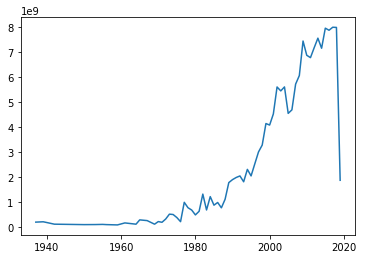

In [27]:
profits_year = df.groupby('Year')['DomesticBox Office'].sum()
plt.plot(profits_year)

Month
9     1.075150e+08
10    1.098688e+08
1     1.150325e+08
8     1.261860e+08
2     1.288910e+08
3     1.411491e+08
4     1.486500e+08
12    1.544891e+08
7     1.556573e+08
11    1.577884e+08
6     1.592400e+08
5     1.981568e+08
Name: DomesticBox Office, dtype: float64
362
734


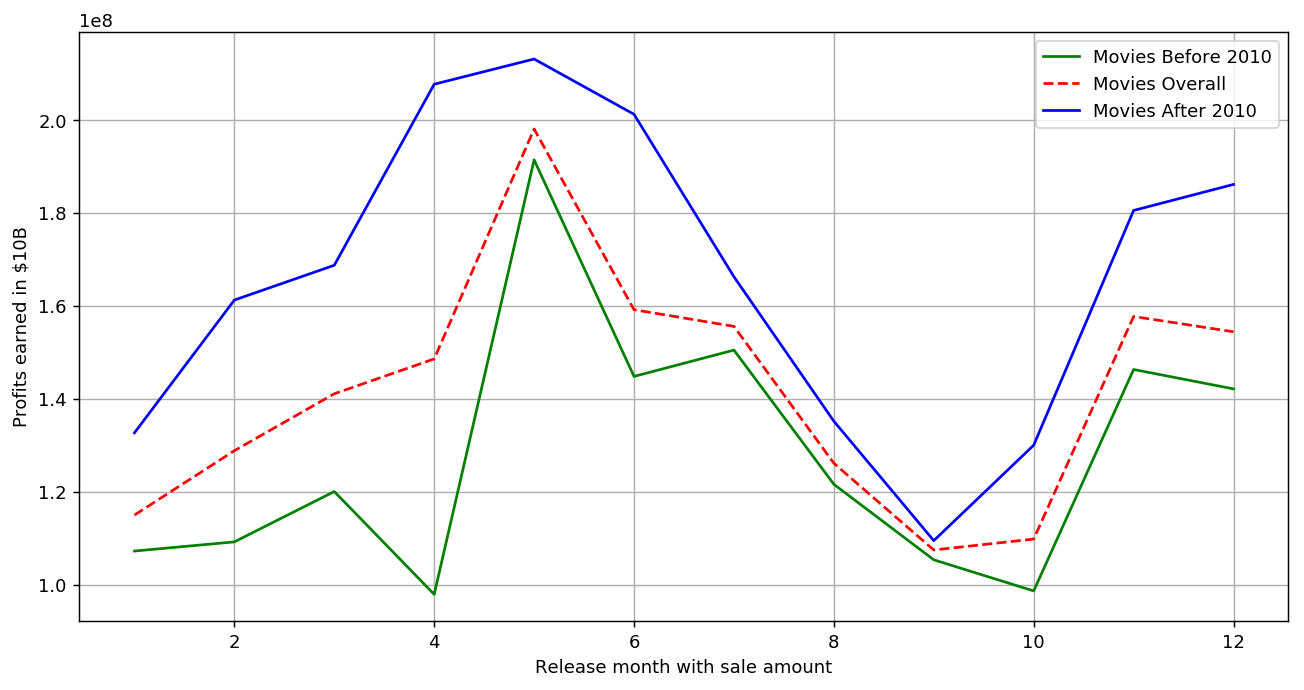

In [28]:
monthly_comp = df.groupby('Month')['DomesticBox Office'].mean()
print(monthly_comp.sort_values())
df_newer = df[df['Year']>2010]
print(len(df_newer))
monthly_comp_newer = df_newer.groupby('Month')['DomesticBox Office'].mean()
df_older = df[df['Year']<=2010]
print(len(df_older))
monthly_comp_older = df_older.groupby('Month')['DomesticBox Office'].mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older, 'g', label = 'Movies Before 2010')
plt.plot(monthly_comp, 'r', linestyle='dashed', label = 'Movies Overall')
plt.plot(monthly_comp_newer, 'b', label = 'Movies After 2010')
plt.legend()
plt.show()

We create new dataframes based on the genre, to see how different genres have their revenues spreaded out within the months according to genres.

In [29]:
df_action = df[df['Genre'].str.contains('Action')]
df_drama = df[df['Genre'].str.contains('Drama')]
df_scifi = df[df['Genre'].str.contains('Sci-Fi')]
df_comedy = df[df['Genre'].str.contains('Comedy')]
#df_action = df[df['Genre']]

169
241


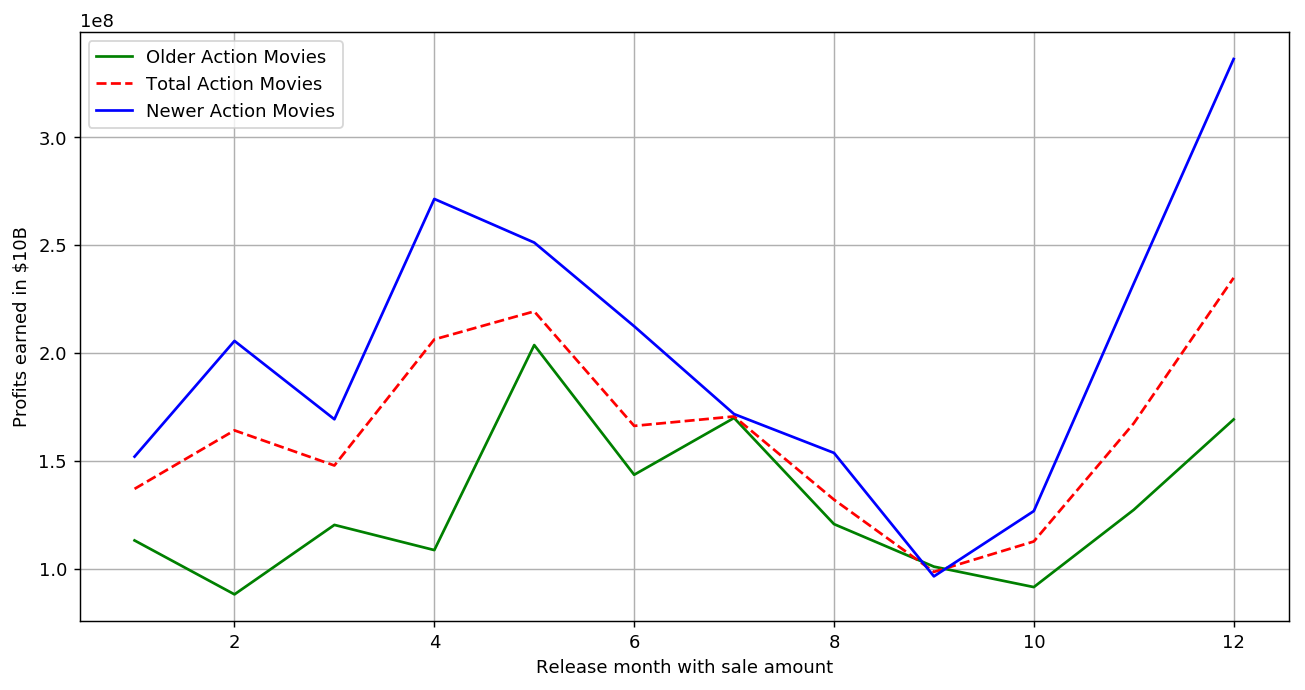

In [30]:
monthly_comp_action = df_action.groupby('Month')['DomesticBox Office'].mean()
df_newer_action = df_action[df_action['Year']>2010]
print(len(df_newer_action))
monthly_comp_newer_action = df_newer_action.groupby('Month')['DomesticBox Office']\
    .mean()
df_older_action = df_action[df_action['Year']<=2010]
print(len(df_older_action))
monthly_comp_older_action = df_older_action.groupby('Month')['DomesticBox Office']\
    .mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older_action, 'g', label = 'Older Action Movies')
plt.plot(monthly_comp_action, 'r',linestyle='dashed',label = 'Total Action Movies')
plt.plot(monthly_comp_newer_action, 'b', label = 'Newer Action Movies')
plt.legend()
plt.show()

103
270


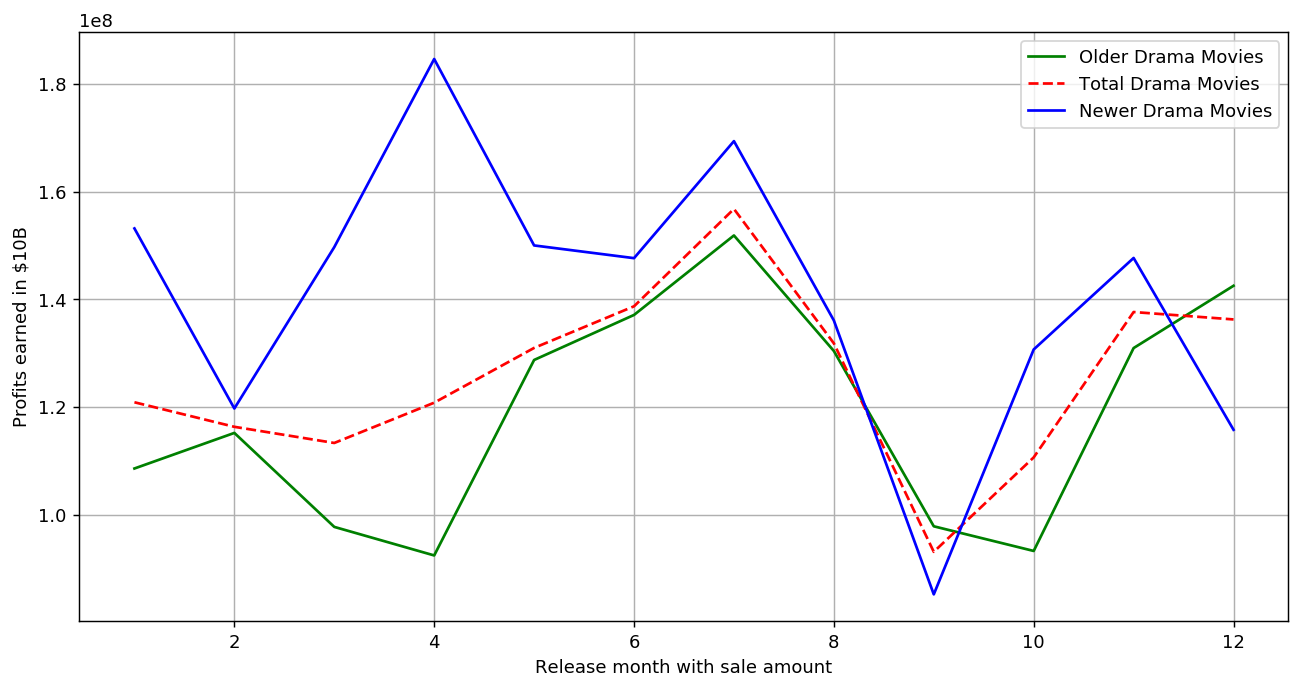

In [31]:
monthly_comp_drama = df_drama.groupby('Month')['DomesticBox Office'].mean()
df_newer_drama = df_drama[df_drama['Year']>2010]
print(len(df_newer_drama))
monthly_comp_newer_drama = df_newer_drama.groupby('Month')['DomesticBox Office']\
    .mean()
df_older_drama = df_drama[df_drama['Year']<=2010]
print(len(df_older_drama))
monthly_comp_older_drama = df_older_drama.groupby('Month')['DomesticBox Office']\
    .mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older_drama, 'g', label='Older Drama Movies')
plt.plot(monthly_comp_drama, 'r',linestyle='dashed', label = 'Total Drama Movies')
plt.plot(monthly_comp_newer_drama, 'b', label = 'Newer Drama Movies')
plt.legend()
plt.show()

112
119


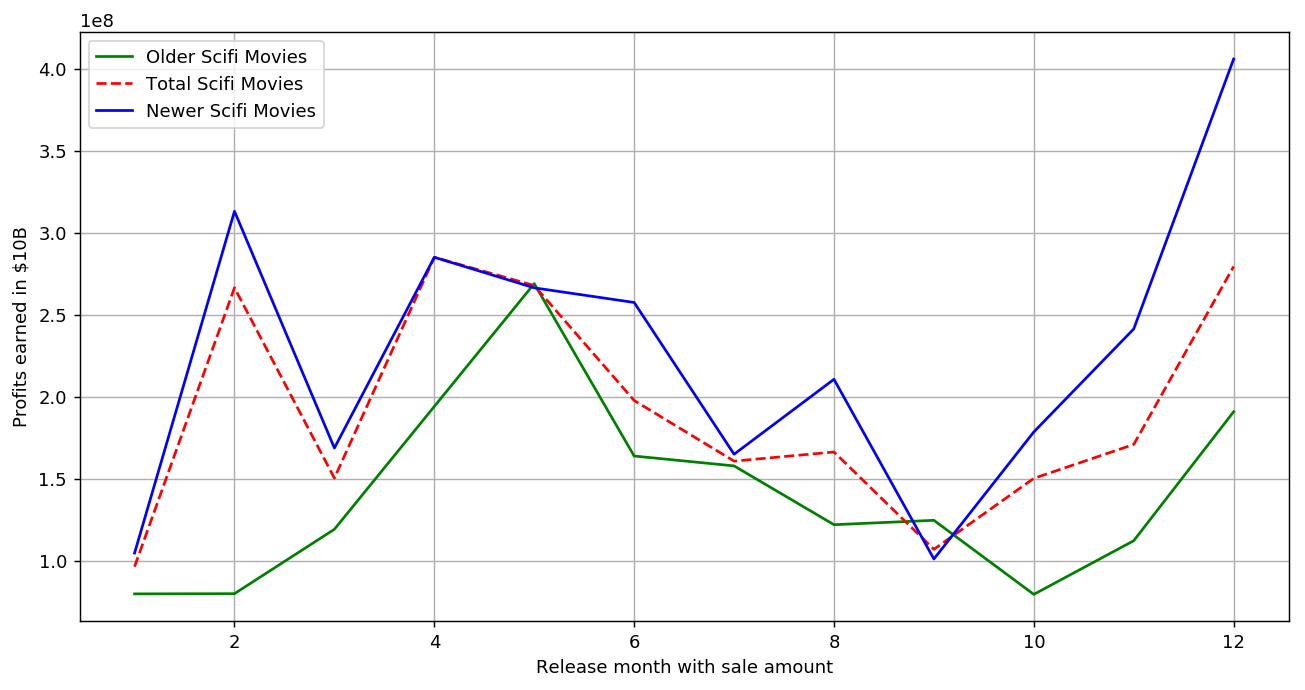

In [32]:
monthly_comp_scifi = df_scifi.groupby('Month')['DomesticBox Office'].mean()
df_newer_scifi = df_scifi[df_scifi['Year']>2010]
print(len(df_newer_scifi))
monthly_comp_newer_scifi = df_newer_scifi.groupby('Month')['DomesticBox Office']\
    .mean()
df_older_scifi = df_scifi[df_scifi['Year']<=2010]
print(len(df_older_scifi))
monthly_comp_older_scifi = df_older_scifi.groupby('Month')['DomesticBox Office']\
    .mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older_scifi, 'g', label = 'Older Scifi Movies')
plt.plot(monthly_comp_scifi, 'r',linestyle ='dashed', label = 'Total Scifi Movies')
plt.plot(monthly_comp_newer_scifi, 'b', label = 'Newer Scifi Movies')
plt.legend()
plt.show()

169
323


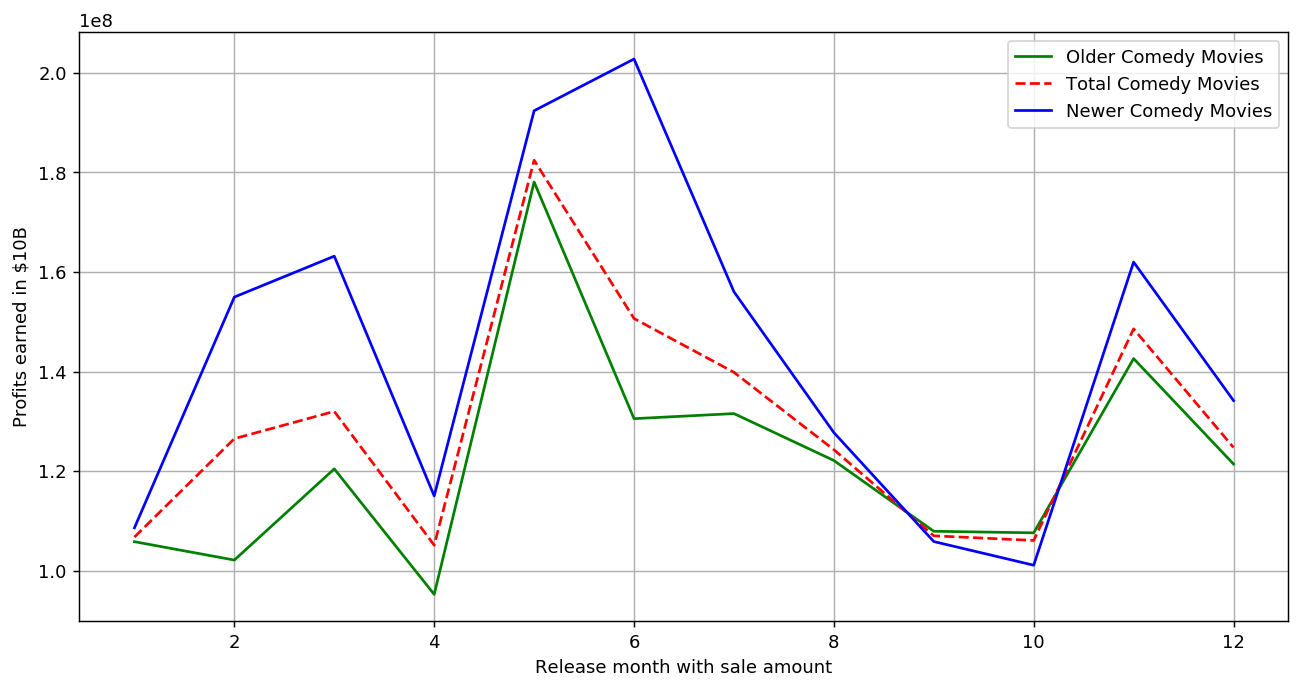

In [33]:
monthly_comp_comedy = df_comedy.groupby('Month')['DomesticBox Office'].mean()
df_newer_comedy = df_comedy[df_comedy['Year']>2010]
print(len(df_newer_action))
monthly_comp_newer_comedy = df_newer_comedy.groupby('Month')['DomesticBox Office']\
    .mean()
df_older_comedy = df_comedy[df_comedy['Year']<=2010]
print(len(df_older_comedy))
monthly_comp_older_comedy = df_older_comedy.groupby('Month')['DomesticBox Office']\
    .mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older_comedy, 'g', label = 'Older Comedy Movies')
plt.plot(monthly_comp_comedy, 'r',linestyle='dashed', label = 'Total Comedy Movies')
plt.plot(monthly_comp_newer_comedy, 'b', label = 'Newer Comedy Movies')
plt.legend()
plt.show()

# Data Analysis & Results

In [34]:
import patsy
import statsmodels.api as sm

## Analysis 1: Revenue as a result of release month, classified by the release year

In the exploratory section, we divided our dataframe into two sets, older movies and newer movies.

First of all, comparing across different genres, it seems that action movies and science fiction movies get higher revenues than dramas and comedies.

Based on the graphs, it seems that May, June, November, and December get high revenues. The other months seem lower. The shape of the graphs of older and newer years seem pretty similar. However, April is extremely different. It was one of the lowest earning months, but becomes one of the highest earning months. This finding is also evident is the graphs for different genres.

Our guess on this is that some popular Marvel movies released in April raised the average and brought more people to the teaters. We will then plot the graph after dropping most popular Marvel movies - Avengers.

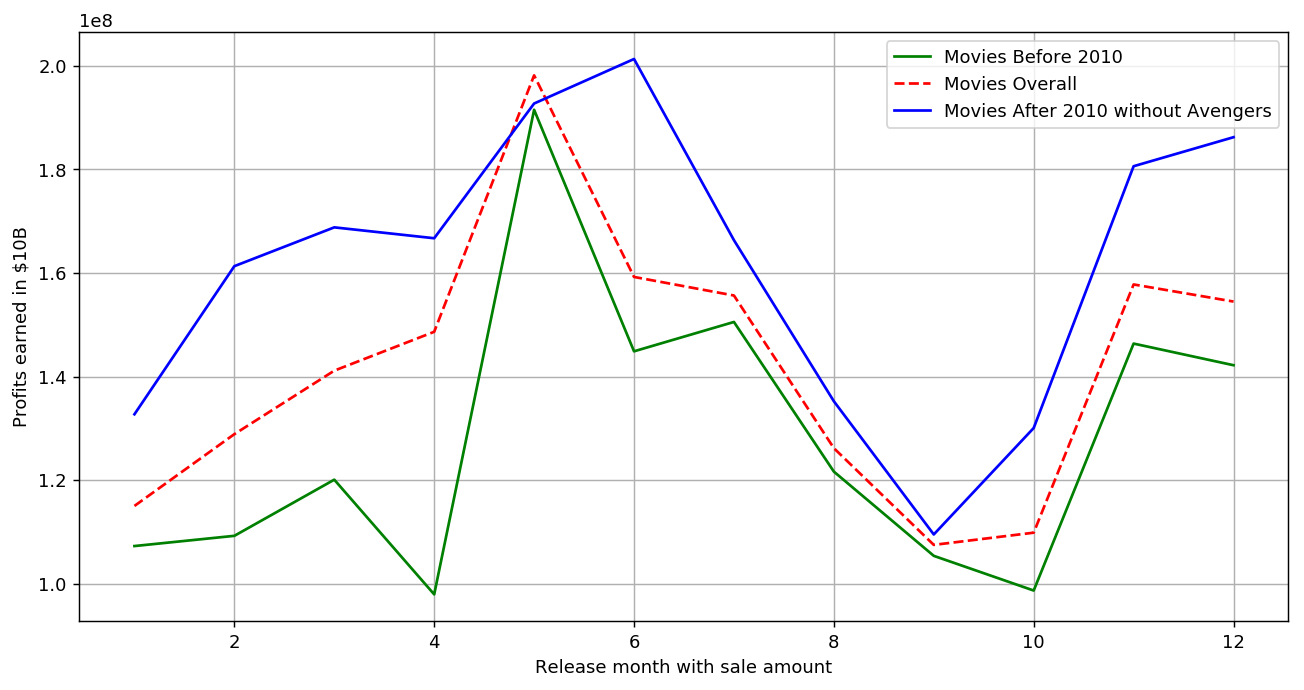

In [35]:
df_newer_no_avengers = \
    df_newer.drop(df_newer[df_newer['Movie'].str.contains('Avengers')].index)
monthly_comp_newer = df_newer_no_avengers.groupby('Month')['DomesticBox Office']\
    .mean()
monthly_comp_older = df_older.groupby('Month')['DomesticBox Office'].mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older, 'g', label = 'Movies Before 2010')
plt.plot(monthly_comp, 'r', linestyle='dashed', label = 'Movies Overall')
plt.plot(monthly_comp_newer, 'b', label = 'Movies After 2010 without Avengers')
plt.legend()
plt.show()

As we can see, April's average revenue dropped by a lot after removing the Avengers. May also dropped but not as much as April. However, April's average revenue for newer years is still high. We believe that this increase in April is partially correlated to the Marvel movies. And it could be the case the these Marvel movies have brought people to the theaters so the average increased as a whole.

Based on this and the fact that December, when people prepare and celebrate Christmas, is also a high earning month, our hypothesis that major social events or concurrent releasing movies might lower the movies' revenue seems to fail.

## Analysis 2: Revenue as a result of release month and ratings

In [36]:
df = pd.read_csv('./data/omdb_cleaned.csv')

First we will visualize the Revenue vs. Month (for all time) again as a box plot in order to eliminate the influences of outliers.

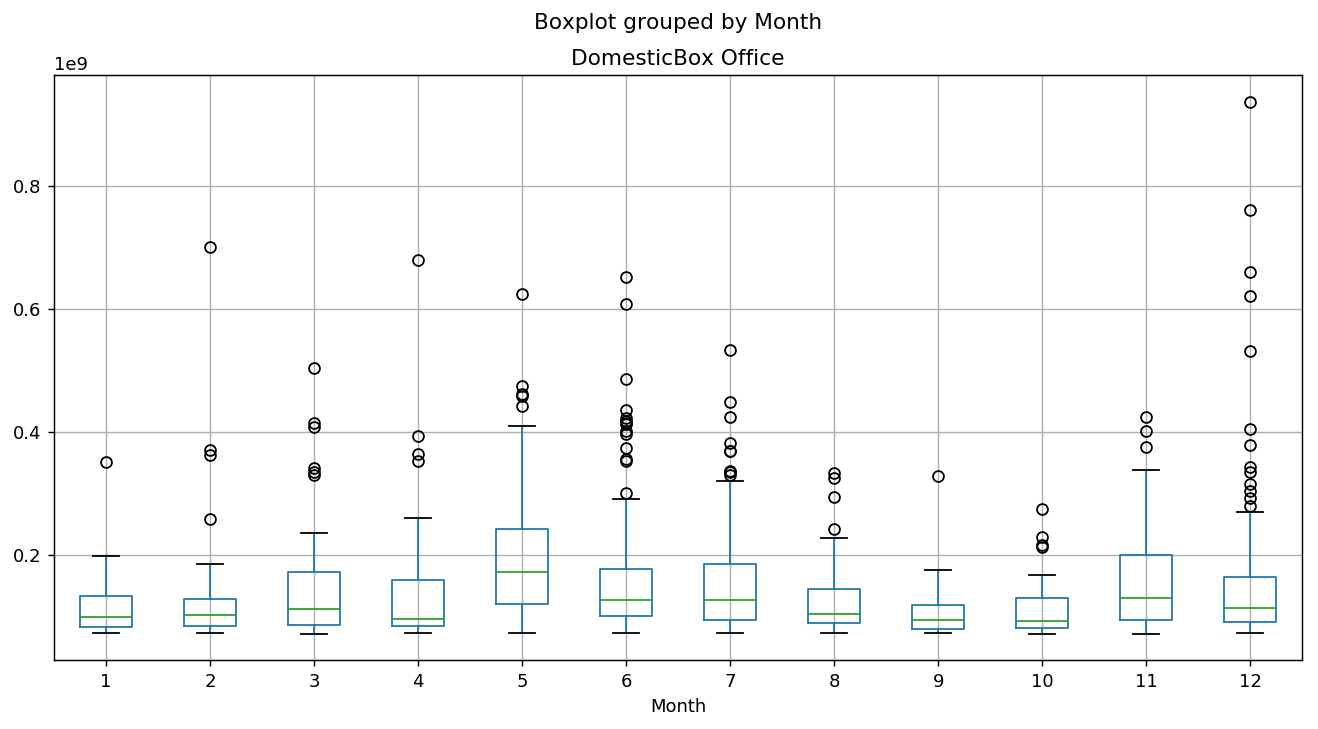

In [37]:
plt.figure(figsize=(12,6),dpi=130)
df.boxplot(by='Month', column='DomesticBox Office', ax=plt.gca())
plt.show()

We can see that overall May is the month that movies get highest revenues. Movies in January, Feburary, September, and October have low revenues. April's Movies also get low revenues overall, but April also has many profitable movies.

Then we will draw the average ratings of movies categorized by release month.

In [38]:
def percent_to_int(strin):
    strin = strin.strip('%')
    return float(strin)/10

def score_to_int(strin):
    strin = strin.split('/')[0]
    return float(strin)/10

df_IMDb = df.copy().dropna(subset=['IMDb Ratings'])
df_Rotten_Tomatoes = df.copy().dropna(subset=['Rotten Tomatoes'])
df_Metacritic = df.copy().dropna(subset=['Metacritic'])

df_Rotten_Tomatoes.loc[:, 'Rotten Tomatoes'] = \
    df_Rotten_Tomatoes['Rotten Tomatoes'].apply(percent_to_int)
df_Metacritic.loc[:, 'Metacritic'] = df_Metacritic['Metacritic'].apply(score_to_int)

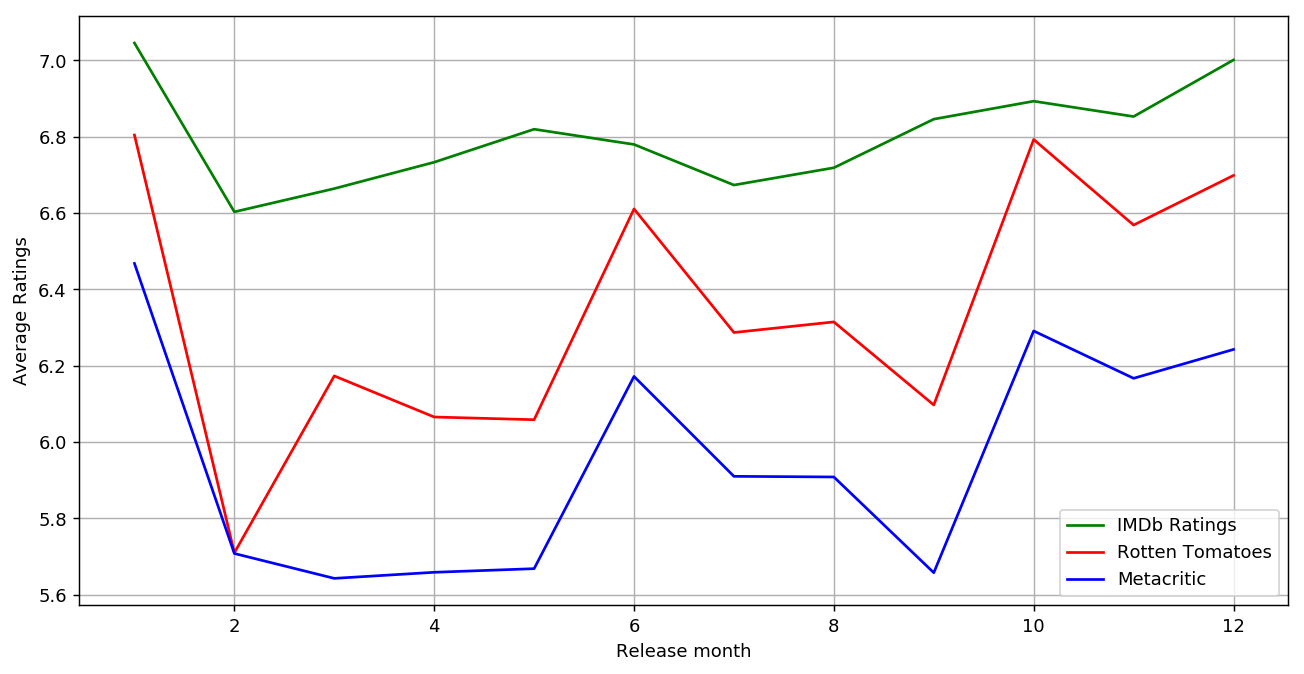

In [39]:
monthly_average_IMDb = df_IMDb.groupby('Month')['IMDb Ratings'].mean()
monthly_average_RT = df_Rotten_Tomatoes.groupby('Month')['Rotten Tomatoes'].mean()
monthly_average_Metacritic = df_Metacritic.groupby('Month')['Metacritic'].mean()

plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month')
plt.ylabel('Average Ratings')
plt.grid()
plt.plot(monthly_average_IMDb, 'g')
plt.plot(monthly_average_RT, 'r')
plt.plot(monthly_average_Metacritic, 'b')
plt.legend()
plt.show()

The three kinds of ratings have roughly the same shape. And they also have roughly the same trend as the curve of Revenue vs. Month, except that the ratings are high in January while the revenues are low. The shape is also similar to the graph of 'Number of Moview released per month'. Thus, we think it is necessary to consider ratings as a potential confounding variable. And see if it has some impacts on revenue. Since all three curves have roughly the same shape, we decide to only use the IMDb ratings in this section. Also, we will only use the movies that receive enough votes for IMDb (more than 25% percentile in the votes field).

In [40]:
quantile = df_IMDb['IMDb Votes'].quantile(0.25)
df_ratings = df_IMDb[df_IMDb['IMDb Votes'] > quantile]

First, we will draw the curve of Revenue vs. Ratings

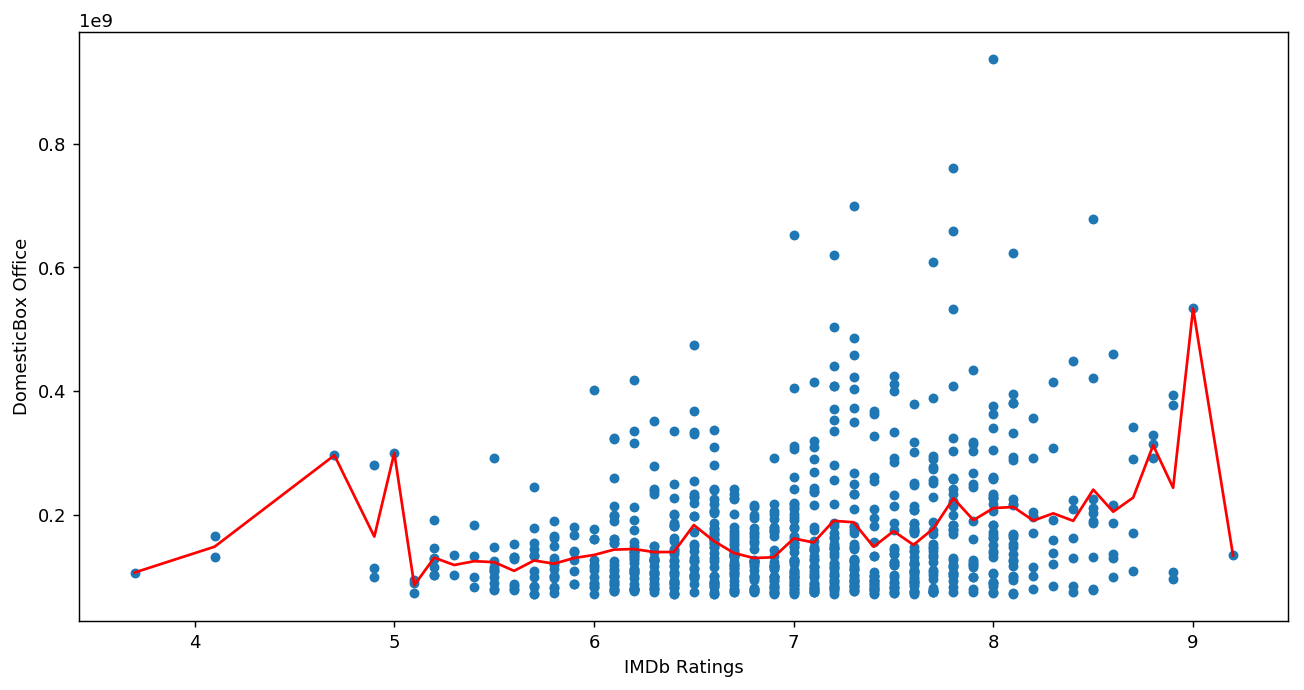

In [41]:
plt.figure(figsize=(12,6),dpi=130)
df_ratings.plot(kind='scatter', x='IMDb Ratings', y='DomesticBox Office',
                ax=plt.gca())
ratingly_average_revenue = df_ratings.groupby('IMDb Ratings')['DomesticBox Office']\
    .mean()
plt.plot(ratingly_average_revenue, 'r')
plt.show()

It seems that there might be a positive correlation between ratings and revenues, but the correlation does not seem too strong.<br>

We will then use a linear model to explore the correlations between revenue, release month, and ratings.

In [42]:
outcome, predictors = patsy.dmatrices("Q('DomesticBox Office') ~ C(Month)",
                                      df_ratings)
model = sm.OLS(outcome, predictors)
res = model.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     Q('DomesticBox Office')   R-squared:                       0.063
Model:                                 OLS   Adj. R-squared:                  0.051
Method:                      Least Squares   F-statistic:                     4.978
Date:                     Sun, 09 Jun 2019   Prob (F-statistic):           1.60e-07
Time:                             15:12:35   Log-Likelihood:                -16303.
No. Observations:                      822   AIC:                         3.263e+04
Df Residuals:                          810   BIC:                         3.269e+04
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [43]:
outcome1, predictors1 =\
    patsy.dmatrices("Q('DomesticBox Office') ~ C(Month) + Q('IMDb Ratings')",
                    df_ratings)
model1 = sm.OLS(outcome1, predictors1)
res1 = model1.fit()
print(res1.summary())

                               OLS Regression Results                              
Dep. Variable:     Q('DomesticBox Office')   R-squared:                       0.127
Model:                                 OLS   Adj. R-squared:                  0.114
Method:                      Least Squares   F-statistic:                     9.802
Date:                     Sun, 09 Jun 2019   Prob (F-statistic):           4.79e-18
Time:                             15:12:35   Log-Likelihood:                -16274.
No. Observations:                      822   AIC:                         3.257e+04
Df Residuals:                          809   BIC:                         3.264e+04
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [44]:
outcome_2, predictors_2 = patsy.dmatrices("Q('IMDb Ratings') ~ C(Month)",
                                          df_ratings)
model2 = sm.OLS(outcome_2, predictors_2)
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:      Q('IMDb Ratings')   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.424
Date:                Sun, 09 Jun 2019   Prob (F-statistic):            0.00570
Time:                        15:12:35   Log-Likelihood:                -989.61
No. Observations:                 822   AIC:                             2003.
Df Residuals:                     810   BIC:                             2060.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.2500      0.144     50.

The result shows that there is a correlation between ratings and revenue, and also a correlation between release month and revenue, based on the p-value. However, there doesn't seem to be a significant relationship between release month and ratings. The r-squred value of ratings against month is also pretty low. Thus, we conclude that ratings do not eliminate the possibility of revenue being dependent on release month. Although the r-squred value of the first model is not high, we believe that it is enough to say that the revenue is partially dependent on release month and ratings.

One thing to note here is that ratings can, to some degrees, reflect the qualities of the movies, which could also influence the revenue. Thus, the correlation between revenue and ratings might not be a direct correlation. However, for our purpose, it is enough to conclude that revenue is dependent on release month even when considering the ratings.

## Analysis 3: Using Machine Learning Algorithms to classify and check the accuracy 

To see the overview of how numbered data can affect the revenue of movies, we used sklearn modules to classify the dataset with different kernels. Then, we chekced the accuracy of prediction on the test set. 

In [45]:
#Useful Libraries for the 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [46]:
# Median Value of Revenue was 118532934 so I used this
# value as the threshold to label 

# Choosing different Revenues changes the accuracy and median
# value of revenue was the best one
df = pd.read_csv('./data/omdb_cleaned.csv') 
df_revenue = df.copy().dropna(subset=['DomesticBox Office'])
#Must use numeric values 
df_numeric = df.select_dtypes(include=[np.number])

df_numeric.head()

,Rank,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings
0,1,2015,12,936662225,778602,8.0
1,2,2009,12,760507625,1038709,7.8
2,3,2018,2,700059566,501220,7.3
3,4,2018,4,678815482,641255,8.5
4,5,1997,12,659363944,946032,7.8


In [47]:
def high_revenue(revenue):
    """ Checks the revenue value and classify them based on threshold. 
    ----------
    revenue: int 
        The int value of revenue 
        
    Returns
    -------
            float
        float value to represent the label 
    """
    #Labeling as 1 if they will be more or equal to the median revenue 
    if rev >= 118532934:
        return 1.0
    
    #Labeling as 0 if they will be less than the median revenue 
    elif rev < 118532934:
        return 0.0
    
#Use function to label each revenues and append to the dataframe
label = []
for ind, rev in enumerate(df_numeric['DomesticBox Office']):
    label.append(high_revenue(rev))   
df_revenue['label'] = label

#Use Numeric values other than Revenue and rank as X
X = df_numeric.drop(axis=1, columns=['DomesticBox Office', 'Rank']).values

#preprocessing.scale() method is helpful in standardization of data points. 
#It would divide by the standard deviation and substract the mean
#for each data point.
X = preprocessing.scale(X)
X = X.reshape(-1, 4)

#Use Label as Y 
Y = df_revenue['label'].values

#Create a Train set of 80% dataset and Test set of 20% dataset
#Did not create randomness to see difference in classifiers used. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 0)

# Using the labeling to check which months were successful

In [48]:
df_revenue['Month'].value_counts()
df_label_org = pd.crosstab(df_revenue.Month, df_revenue.label)
print(df_label_org)
zero_count =df_label_org.groupby('Month')[0].mean()
one_count = df_label_org.groupby('Month')[1].mean()
label_one_ratio = one_count/(zero_count+one_count)
print(label_one_ratio)

label  0.0  1.0
Month          
1       30   16
2       39   22
3       43   38
4       24   15
5       28   83
6       71   98
7       60   76
8       44   25
9       29   10
10      43   16
11      55   77
12      82   72
Month
1     0.347826
2     0.360656
3     0.469136
4     0.384615
5     0.747748
6     0.579882
7     0.558824
8     0.362319
9     0.256410
10    0.271186
11    0.583333
12    0.467532
dtype: float64


Based on just using labeling to see the mean successfulness of each month, we can conclude that May, November, June, and July are the best Months to release movies. They have higher ratio of going over the median Revenue. 

## SVM with Linear Kernel

In [49]:
#Define classifier 
classifier = svm.SVC(kernel='linear')

#fit the train sets
classifier.fit(X_train,Y_train)

#Predict the label with train and test X set
pred_Y_train = classifier.predict(X_train)
pred_Y_test = classifier.predict(X_test)

print("Train Set Report: ", "\n", classification_report(Y_train,pred_Y_train))
print("Test Set Report: ", "\n", classification_report(Y_test,pred_Y_test))

Train Set Report:  
               precision    recall  f1-score   support

         0.0       0.63      0.76      0.69       423
         1.0       0.72      0.58      0.64       453

   micro avg       0.67      0.67      0.67       876
   macro avg       0.67      0.67      0.66       876
weighted avg       0.67      0.67      0.66       876

Test Set Report:  
               precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       125
         1.0       0.67      0.59      0.63        95

   micro avg       0.70      0.70      0.70       220
   macro avg       0.69      0.68      0.68       220
weighted avg       0.69      0.70      0.69       220



The labels represent whether movie will reach higher revenue or lower revenue than the median revenue of all movies in the dataset. Based on the precision of labeling in both Training and test set, we can conclude the classification based on month and ratings were not really accurate to predict the labeling of movies. 

## SVM with Linear Kernel

We have used the code from COGS 118A Homework 5 code implementations to implement the draw_heatmap function. Also, gridsearch algorithm was implemented by Byungkwon Han beforehand.  

In [50]:
#Create SVM Classifier with Linear Kernel
classifier = svm.SVC(kernel='linear')

#Hyper parameters to use for the SVM Classifier
C_list     = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1] # Different C to try.
parameters = {'kernel':['linear'], 'C': C_list}

#Performing Grid Search with SVM Linear Clssifier
grid = GridSearchCV(classifier,parameters)

#Fitting train sets
grid.fit(X_train,Y_train)

#Gets the avg Train Score of the trained classifier 
grid_train_result = grid.cv_results_['mean_train_score']
grid_train_result = grid_train_result.reshape(6,1)

#Gets the avg Validation Score of the trained classifier 
grid_valid_result = grid.cv_results_['mean_test_score']
grid_valid_result = grid_valid_result.reshape(6,1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [51]:
def draw_heatmap_linear(acc, acc_desc, C_list):
    """ Draw the heatmap of Linear Kernel 
    ----------
    acc: int 
        The int value of revenue 
    
    acc_desc: String
        The name of what accuracy represent
    
    C_list: list
        The list of C hyper parameters to be used.
    """
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

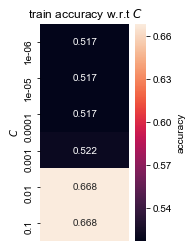

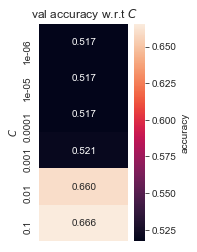

In [52]:
#Draw the heat map of Trained accuracy to see which C value is the
#best hyper parameter
#Also see the accuracy of our classification
train_acc = grid_train_result
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

#Draw the heat map of Validation accuracy to see which C value is
#the best hyper parameter
#Also see the accuracy of our classification
val_acc = grid_valid_result
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [53]:
#Using the Best C to predict accuracy of SVM Classifier
test_accX = grid.best_estimator_.predict(X_test) == Y_test
print(grid.best_params_)
print(sum(test_accX))
test_acc = sum(test_accX)/len(test_accX)
print(test_acc)

{'C': 0.1, 'kernel': 'linear'}
153
0.6954545454545454


Again, the accuracy of test set was pretty low. We used the best hyper parameter for SVM classifier and it still showed about 69% accuracy. 

## Using RBF to classify and calculate the accuracy of labeling

We have used the code from COGS 118A Homework 5 code implementations to implement the draw_heatmap function. Also, gridsearch algorithm was implemented by Byungkwon Han beforehand.  

In [54]:
#Create SVM Classifier with RBF Kernel
classifier = svm.SVC(kernel='rbf')

#Hyper parameters to use for the SVM Classifier
C_list     = [0.1, 1, 10, 100] # Different C to try.
gamma_list = [10**-7, 10**-6, 10**-5, 10**-4] # Different gamma to try.
parameters = {'kernel':['rbf'], 'C': C_list, 'gamma': gamma_list}

#Performing Grid Search with SVM RBF Clssifier
gridG = GridSearchCV(classifier,parameters)

#Fitting train sets
gridG.fit(X_train,Y_train)

#Gets the avg Training Score of the trained classifier 
grid_train_result = gridG.cv_results_['mean_train_score']
grid_train_result = grid_train_result.reshape(4,4)

#Gets the avg Validation Score of the trained classifier 
grid_valid_result = gridG.cv_results_['mean_test_score']
grid_valid_result = grid_valid_result.reshape(4,4)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


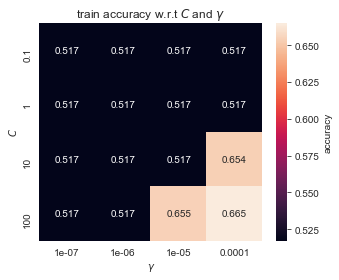

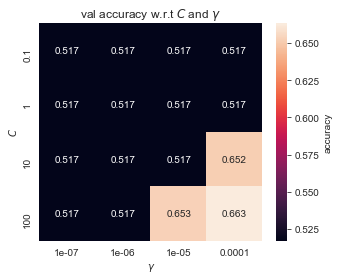

In [55]:
def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    """ Draw the heatmap of RBF Kernel 
    ----------
    acc: int 
        The int value of revenue 
    
    acc_desc: String
        The name of what accuracy represent
        
    gamma_list: list
        The list of gamma hyper parameters to be used. 
        
    C_list: list
        The list of C hyper parameters to be used.
    """
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#Draw the heat map of Trained accuracy to see which C and gamma
#value is the best hyper parameter
#Also see the accuracy of our classification
train_acc = grid_train_result
draw_heatmap_RBF(train_acc, 'train accuracy', gamma_list, C_list)

#Draw the heat map of Validation accuracy to see which C and gamma
#value is the best hyper parameter
#Also see the accuracy of our classification
val_acc = grid_valid_result
draw_heatmap_RBF(val_acc, 'val accuracy',gamma_list, C_list)    

In [56]:
#Using the Best C and gamma to predict accuracy of SVM Classifier
test_accX = gridG.best_estimator_.predict(X_test) == Y_test
print(gridG.best_params_)
print(sum(test_accX))
test_acc = sum(test_accX)/len(test_accX)
print(test_acc)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
152
0.6909090909090909


The RBF Kernel predicted one more label wrong than the Linear Kernel. Still, the accuracy remained around 69% range and we can say numerical values did not accurately predict the label (the successfulness of the movies). 

## Using DecisionTree to classify and calculate the accuracy of labeling

We have used the code from COGS 118A Homework 5 code implementations to implement the draw_heatmap function. Also, gridsearch algorithm was implemented by Byungkwon Han beforehand.  

In [57]:
#Hyper parameters to use for the Decision Tree Classifier
depth_list = [1,2,3,4,5]
param  = {"criterion":["entropy"],'max_depth':depth_list}

#Using the Decision Tree Classifier to grid search 
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid = param, cv=5)

#Fitting Train set
grid.fit(X_train,Y_train) 

#Gets the avg Training Score of the trained classifier 
grid_train_result = grid.cv_results_['mean_train_score']
grid_train_result = grid_train_result.reshape(5,1)

#Gets the avg Validation Score of the trained classifier 
grid_valid_result = grid.cv_results_['mean_test_score']
grid_valid_result = grid_valid_result.reshape(5,1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


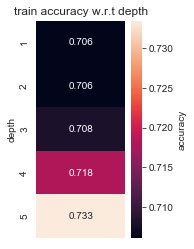

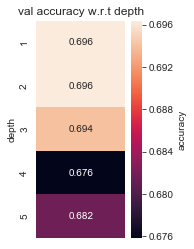

In [58]:
def draw_heatmap(acc, acc_desc, depth_list):
    """ Draw the heatmap of Decision Tree Classifier
    ----------
    acc: int 
        The int value of revenue 
    
    acc_desc: String
        The name of what accuracy represent
    
    depth_list: list
        The list of depth hyper parameters to be used.
    """
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list,
                     xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

#Draw the heat map of Trained accuracy to see which decision tree's
#depth is the best hyper parameter
#Also see the accuracy of our classification
train_acc = grid_train_result
draw_heatmap(train_acc, 'train accuracy', depth_list)

#Draw the heat map of Validation accuracy to see which decision tree's
#depth is the best hyper parameter
#Also see the accuracy of our classification
val_acc = grid_valid_result
draw_heatmap(val_acc, 'val accuracy', depth_list) 

In [59]:
#Using the Best depth to predict accuracy of Decision Tree Classifier
test_accX = grid.best_estimator_.predict(X_test) == Y_test
print(grid.best_params_)
print(sum(test_accX))
test_acc = sum(test_accX)/len(test_accX)
print(test_acc)

{'criterion': 'entropy', 'max_depth': 1}
141
0.6409090909090909


The decision Tree classifier had 5% less accuracy in predicting the test labels. Therefore, it was more inefficient in classifying the label with numerical datas.

Overall, we don't think it's really accurate to predict revenues based on the month, year, and ratings from websites. However, 70% range of accuracy is pretty good to believe while knowing the 30% possiblities of the errors in classification. Thus, we can assume the use of median revenue to label domestic box office profits is useable; we may use the data to predict that May, November, June, and July are good months to release movies. 

# Ethics & Privacy

The data we use from The-Numbers and OMDb API is open source to the public and we just merged them together. The rich source of data from The-Numbers is collected through professionals over more than twenty years. Meanwhile, OMDb API collects its data from IMDb, Rotten Tomatoes, and Metacritic databases. These three websites are widely used in public to describe movie ratings and reviews, therefore there was no personal information in any of the datasets that would concern privacy. There would be no need for data protection because the datasets that we obtained both had the private information (the data went through anonymization by the dataset providers) about the data removed, therefore, we don't need to protect our data since it's available to the public.

We removed four of the movies, two in which had no information on OMDb, and two where the information was wrong and didn't include the month. We were trying to represent the data as honest as we could obtain it. There were no privacy issues due to the nature of our data set. Those movies could change the shape of our data slightly, however, we couldn't obtain the data for them, therefore, we removed them for completeness of our data. We noticed that the newer movies plot was affected by superhero movies; we created a new data frame to remove the bias of Marvel movies to see how normal movies would behave on our plot, however, the trend of the plot seemed to change shape according to the Marvel movies.

# Conclusion & Discussion

We hypothesized that a movie will earn more revenue if it is released during the leisure months of its targeted audiences. Based on our first data analysis, we discovered that in December, where the majority of the people in the United States prepare for and celebrate Christmas, the movie revenues are high compared to some other months. In addition, the movie revenues peaked in the summer and are the lowest in January and September. These are 2 of the busiest months for students who come back from winter break and summer break during those months which is a possible reason for the dips in revenue during those months. Therefore, our first hypothesis is accepted but there may be confounding variables such as movie quality, stress at that point of the year, etc that we are unable to analyze.

Our second hypothesis stated that movie revenues will be lowered if they are released concurrently with other events, which include major social/entertainment events and popular movies. Based on our first analysis, we found that popular movies, Marvel movies, etc, are released in April or May annually. After dropping those movies to visualize the data, the profits made in April and May are still high. This means that the revenues of the movies are not affected by the concurrency of their release dates with those of the popular movies. Furthermore, as said before, the movie revenues are still high during the Christmas season in December, so this means that they are not affected by social or entertainment events. Hence, the second hypothesis is rejected.

The second analysis shows that there is a correlation between ratings and revenue, as well as a correlation between the release month and revenue. However, it does not seem to have any significant relationship between the release month and ratings. Therefore, we conclude that ratings do not eliminate the possibility of revenue being dependent on release month and ratings. Although the r-squred value of the first model is not high, we believe that it is enough to say that the revenue is partially dependent on release month and ratings. One thing to note here is that ratings can, to some degree, reflect the qualities of the movies, which could also influence the revenue. Thus, the correlation between revenue and ratings might not be a direct correlation. However, for our purpose, it is enough to conclude that revenue is dependent on release month even when considering the ratings.

One of the conclusions that could be made based on our observations is that Marvel movies (superhero movies overall) releasing their movies during April has brought more people to the theaters. Some of the Marvel major movies get released during April (such as Infinity War, Capitan America, Winter Soldier, and etc.) and we’re able to see that the trend of the recent April movies (even without Marvel) seems to be increasing and having a smaller dip in recent years, meaning that Marvel movies has brought more people to the theaters. This gives us the opportunity to come up with the hypothesis that maybe releasing a smaller movie when a big movie is out could be a perk for the movie because they get more recognition. However, releasing a small movie when a big movie may also cause the smaller movie to not get viewed as much because everyone would go directly to the bigger movie. The future of this project can lean towards exploring the answer to such problems, since it could help the movie makers to release their movie on a better time, but more in depth analysis would be required to make such conclusions, and at this stage it’s just a hypothesis.
